In [632]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
import os
import scipy.io
from PIL import Image
import cv2

#!pip install scikit-image
from skimage import color
from skimage import io
from skimage.io import imread, imsave

plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})


In [633]:
imgname = "images/image0.jpg"

Increasing the resolution of the image ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

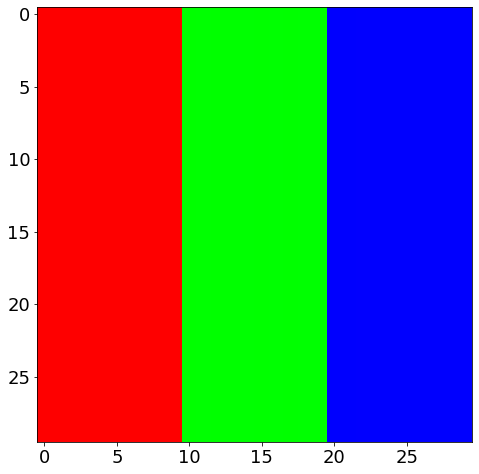

In [634]:
img0 = io.imread(imgname)
img1 = img0
#img1 = color.rgb2gray(img0).astype(float)

plt.imshow(img1) # Original image

In [635]:
def enhance(X, reps):

    Y = np.repeat(X, repeats= reps, axis=0)
    Z = np.repeat(Y, repeats= reps, axis=1)
    return(Z)

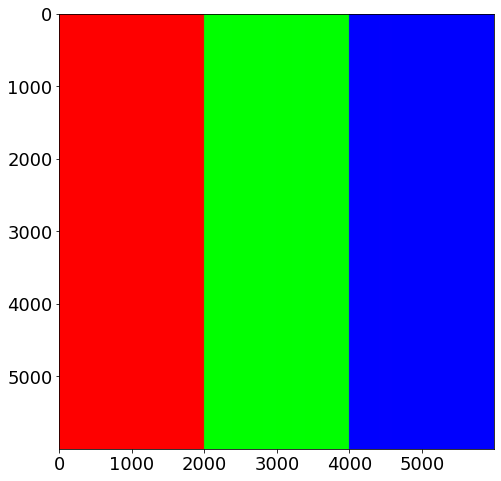

In [649]:
photo = enhance(img1, 3)
imsave("images/Hi-Res.jpg", photo, dpi=(300, 300), resample=Image.LANCZOS)
plt.imshow(photo)  # Hi-Res image

Using rSVD to compress the image in grayscale -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [637]:
# Define randomized SVD function
def rSVD(X, r, q, p):
    # Step 1: Sample column space of X with P matrix
    ny = X.shape[1]
    P = np.random.randn(ny, r+p)
    Z = X @ P
    for k in range(q):
        Z = X @ (X.T @ Z)

    Q, R = np.linalg.qr(Z, mode='reduced')

    # Step 2: Compute SVD on projected Y = Q.T @ X
    Y = Q.T @ X
    UY, S, VT = np.linalg.svd(Y, full_matrices=0)
    U = Q @ UY

    return U, S, VT

In [638]:
A = img0
X = np.mean(A, axis=2)  # Convert RGB -> grayscale

r = 400  # Target rank
q = 1   # Power iterations
p = 5   # Oversampling parameter

rU, rS, rVT = rSVD(X, r, q, p)

In [639]:
## Reconstruction
XrSVD = rU[:, :(r+1)] @ np.diag(rS[:(r+1)]
                                ) @ rVT[:(r+1), :]  # SVD approximation
errSVD = np.linalg.norm(X-XrSVD, ord=2) / np.linalg.norm(X, ord=2)

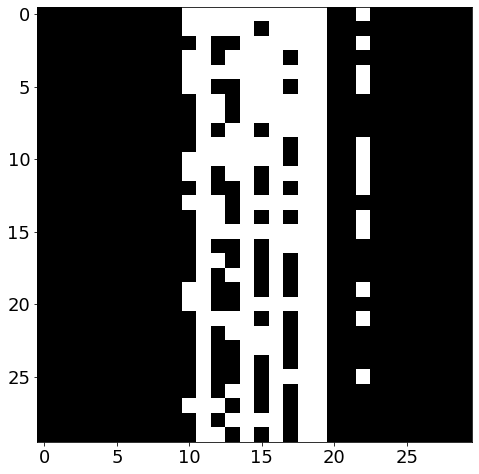

In [640]:
plt.set_cmap('gray')
plt.imshow(XrSVD.astype('uint8'))  # Compressed image in grayscale only

Using rSVD to compress the image in color ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

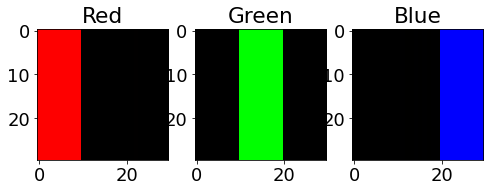

In [641]:
im = cv2.imread(imgname)
im1_blue, im1_green, im1_red = cv2.split(im)

#img = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
#im_pil = Image.fromarray(img)

k = np.zeros_like(im1_blue)
bl = cv2.merge([k, k, im1_blue])
gr = cv2.merge([k, im1_green, k])
re = cv2.merge([im1_red, k, k])

fig, axs = plt.subplots(1, 3)

axs[0].imshow(re.astype('uint8'))
axs[0].title.set_text('Red')
axs[1].imshow(gr.astype('uint8'))
axs[1].title.set_text('Green')
axs[2].imshow(bl.astype('uint8'))
axs[2].title.set_text('Blue')

plt.show() # Shows all three color channels of the original image separately (tinted)


In [642]:
A = img0
X = np.mean(A, axis=2)  # Convert RGB -> grayscale

r = 400  # Target rank
q = 1   # Power iterations
p = 5   # Oversampling parameter

rU1, rS1, rVT1 = rSVD(im1_blue, r, q, p)
rU2, rS2, rVT2 = rSVD(im1_green, r, q, p)
rU3, rS3, rVT3 = rSVD(im1_red, r, q, p)

XrSVD_blue = rU1[:, :(r+1)] @ np.diag(rS1[:(r+1)]
                                ) @ rVT1[:(r+1), :]

XrSVD_green = rU2[:, :(r+1)] @ np.diag(rS2[:(r+1)]
                                ) @ rVT2[:(r+1), :]

XrSVD_red = rU3[:, :(r+1)] @ np.diag(rS3[:(r+1)]
                                  ) @ rVT3[:(r+1), :]


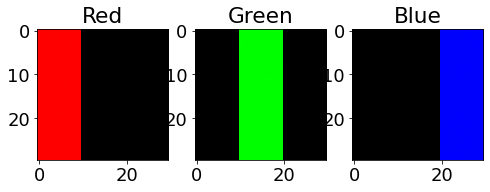

In [643]:
fig, axs = plt.subplots(1, 3)

k = np.zeros_like(XrSVD_blue)
bl = cv2.merge([k, k, XrSVD_blue])
gr = cv2.merge([k, XrSVD_green, k])
re = cv2.merge([XrSVD_red, k, k])

#plt.set_cmap('gray')
axs[0].imshow(re.astype('uint8'))
axs[0].title.set_text('Red')
axs[1].imshow(gr.astype('uint8'))
axs[1].title.set_text('Green')
axs[2].imshow(bl.astype('uint8'))
axs[2].title.set_text('Blue')

plt.show() # Shows all three color channels of the compressed image separately


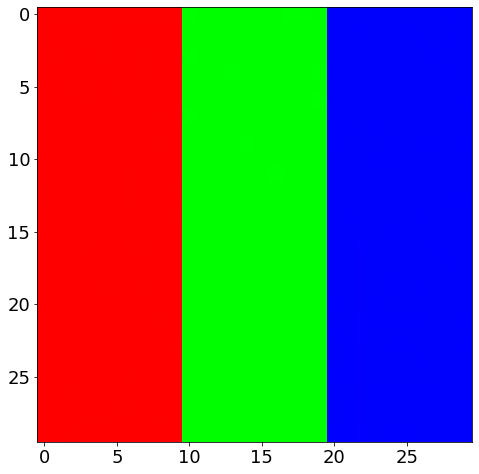

In [644]:
RGB = cv2.merge([XrSVD_red, XrSVD_green, XrSVD_blue])
plt.imshow(RGB.astype('uint8'))  # Compressed image

In [645]:
im = Image.open(imgname)
print(im.size)


(30, 30)


In [646]:
im = Image.open("images/Hi-Res.jpg")
print(im.size)

(270, 270)
